<a href="https://colab.research.google.com/github/samuel-oluwemimo/ML_Exercise/blob/main/car_price_prediction_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Normalization

dataset = pd.read_csv('train.csv')
dataset.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [3]:
dataset.shape

(1000, 12)

In [4]:
tf_data = tf.constant(dataset)
tf_data = tf.cast(tf_data, tf.float32)
tf_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [5]:
tf_data= tf.random.shuffle(tf_data)
tf_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[6.590000e+02, 5.465230e+05, 7.195900e+05, ..., 9.500000e+01,
        1.090000e+02, 1.803685e+05],
       [1.050000e+02, 5.002650e+05, 7.531480e+05, ..., 1.080000e+02,
        8.400000e+01, 4.176935e+05],
       [1.380000e+02, 5.210230e+05, 7.130000e+05, ..., 5.700000e+01,
        1.260000e+02, 3.826760e+05],
       ...,
       [6.230000e+02, 5.988760e+05, 8.191610e+05, ..., 7.600000e+01,
        1.380000e+02, 3.324785e+05],
       [8.740000e+02, 6.740510e+05, 7.089190e+05, ..., 5.200000e+01,
        7.500000e+01, 2.057165e+05],
       [2.810000e+02, 6.909550e+05, 7.148040e+05, ..., 8.400000e+01,
        1.260000e+02, 4.328360e+05]], dtype=float32)>

In [6]:
X = tf_data[:, 3:-1]
X.shape

TensorShape([1000, 8])

In [7]:
y = tf_data[:, -1]
y.shape

TensorShape([1000])

In [8]:
normalizer = Normalization()
normalizer.adapt(X)
normalizer(X)

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[ 0.83749485,  0.45808098,  1.4350005 , ...,  1.6654116 ,
         0.5097853 ,  0.26496223],
       [ 1.4194926 , -1.6328115 ,  1.4350005 , ...,  0.88735217,
         1.1437252 , -0.92278886],
       [ 0.2554971 , -1.1754031 ,  1.4350005 , ...,  0.5242578 ,
        -1.3432697 ,  1.0726329 ],
       ...,
       [ 0.83749485,  0.01220467,  0.00855854, ..., -0.04631917,
        -0.41674218,  1.6427535 ],
       [-1.4904962 ,  0.73245054,  0.7217795 , ..., -0.20193106,
        -1.5870926 , -1.3503792 ],
       [ 0.83749485, -1.1182914 ,  0.7217795 , ..., -0.8243786 ,
        -0.02662536,  1.0726329 ]], dtype=float32)>

In [9]:

model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Input(shape = (8,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 input_1 (InputLayer)        multiple                  0         
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                        

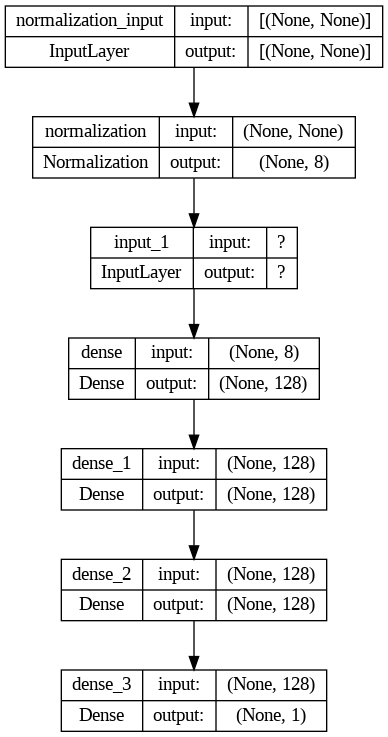

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [15]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [tf.keras.metrics.MeanAbsoluteError()]
)

In [23]:
dataset_size = tf.shape(X)[0]
train_size = int(0.8 * tf.cast(dataset_size, tf.float32)) # 80% for training

# Shuffle the dataset
indices = tf.range(dataset_size)
shuffled_indices = tf.random.shuffle(indices)
X_shuffled = tf.gather(X, shuffled_indices)
y_shuffled = tf.gather(y, shuffled_indices)

# Split the dataset
X_train = X_shuffled[:train_size]
X_test = X_shuffled[train_size:]
y_train = y_shuffled[:train_size]
y_test = y_shuffled[train_size:]

In [25]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
23/23 [==============================] - 0s 7ms/step - loss: 14355126272.0000 - mean_absolute_error: 100660.1250 - val_loss: 14578299904.0000 - val_mean_absolute_error: 101373.6719
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 11081180160.0000 - mean_absolute_error: 87870.8359 - val_loss: 11283916800.0000 - val_mean_absolute_error: 89459.8984
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 8542069248.0000 - mean_absolute_error: 76239.4609 - val_loss: 8835318784.0000 - val_mean_absolute_error: 79351.4531
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 6709968896.0000 - mean_absolute_error: 66918.1797 - val_loss: 7172183040.0000 - val_mean_absolute_error: 71263.8281
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 5444981760.0000 - mean_absolute_error: 59876.5703 - val_loss: 5911069696.0000 - val_mean_absolute_error: 64309.2930
Epoch 6/100
23/23 [==============================

In [26]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 8ms/step - loss: 1937249792.0000 - mean_absolute_error: 35586.0938


[1937249792.0, 35586.09375]

In [29]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 7ms/step


In [28]:
y_test[0]

<tf.Tensor: shape=(), dtype=float32, numpy=413424.5>

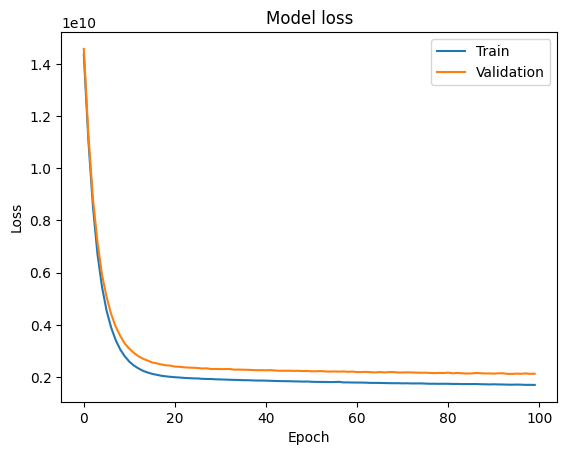

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

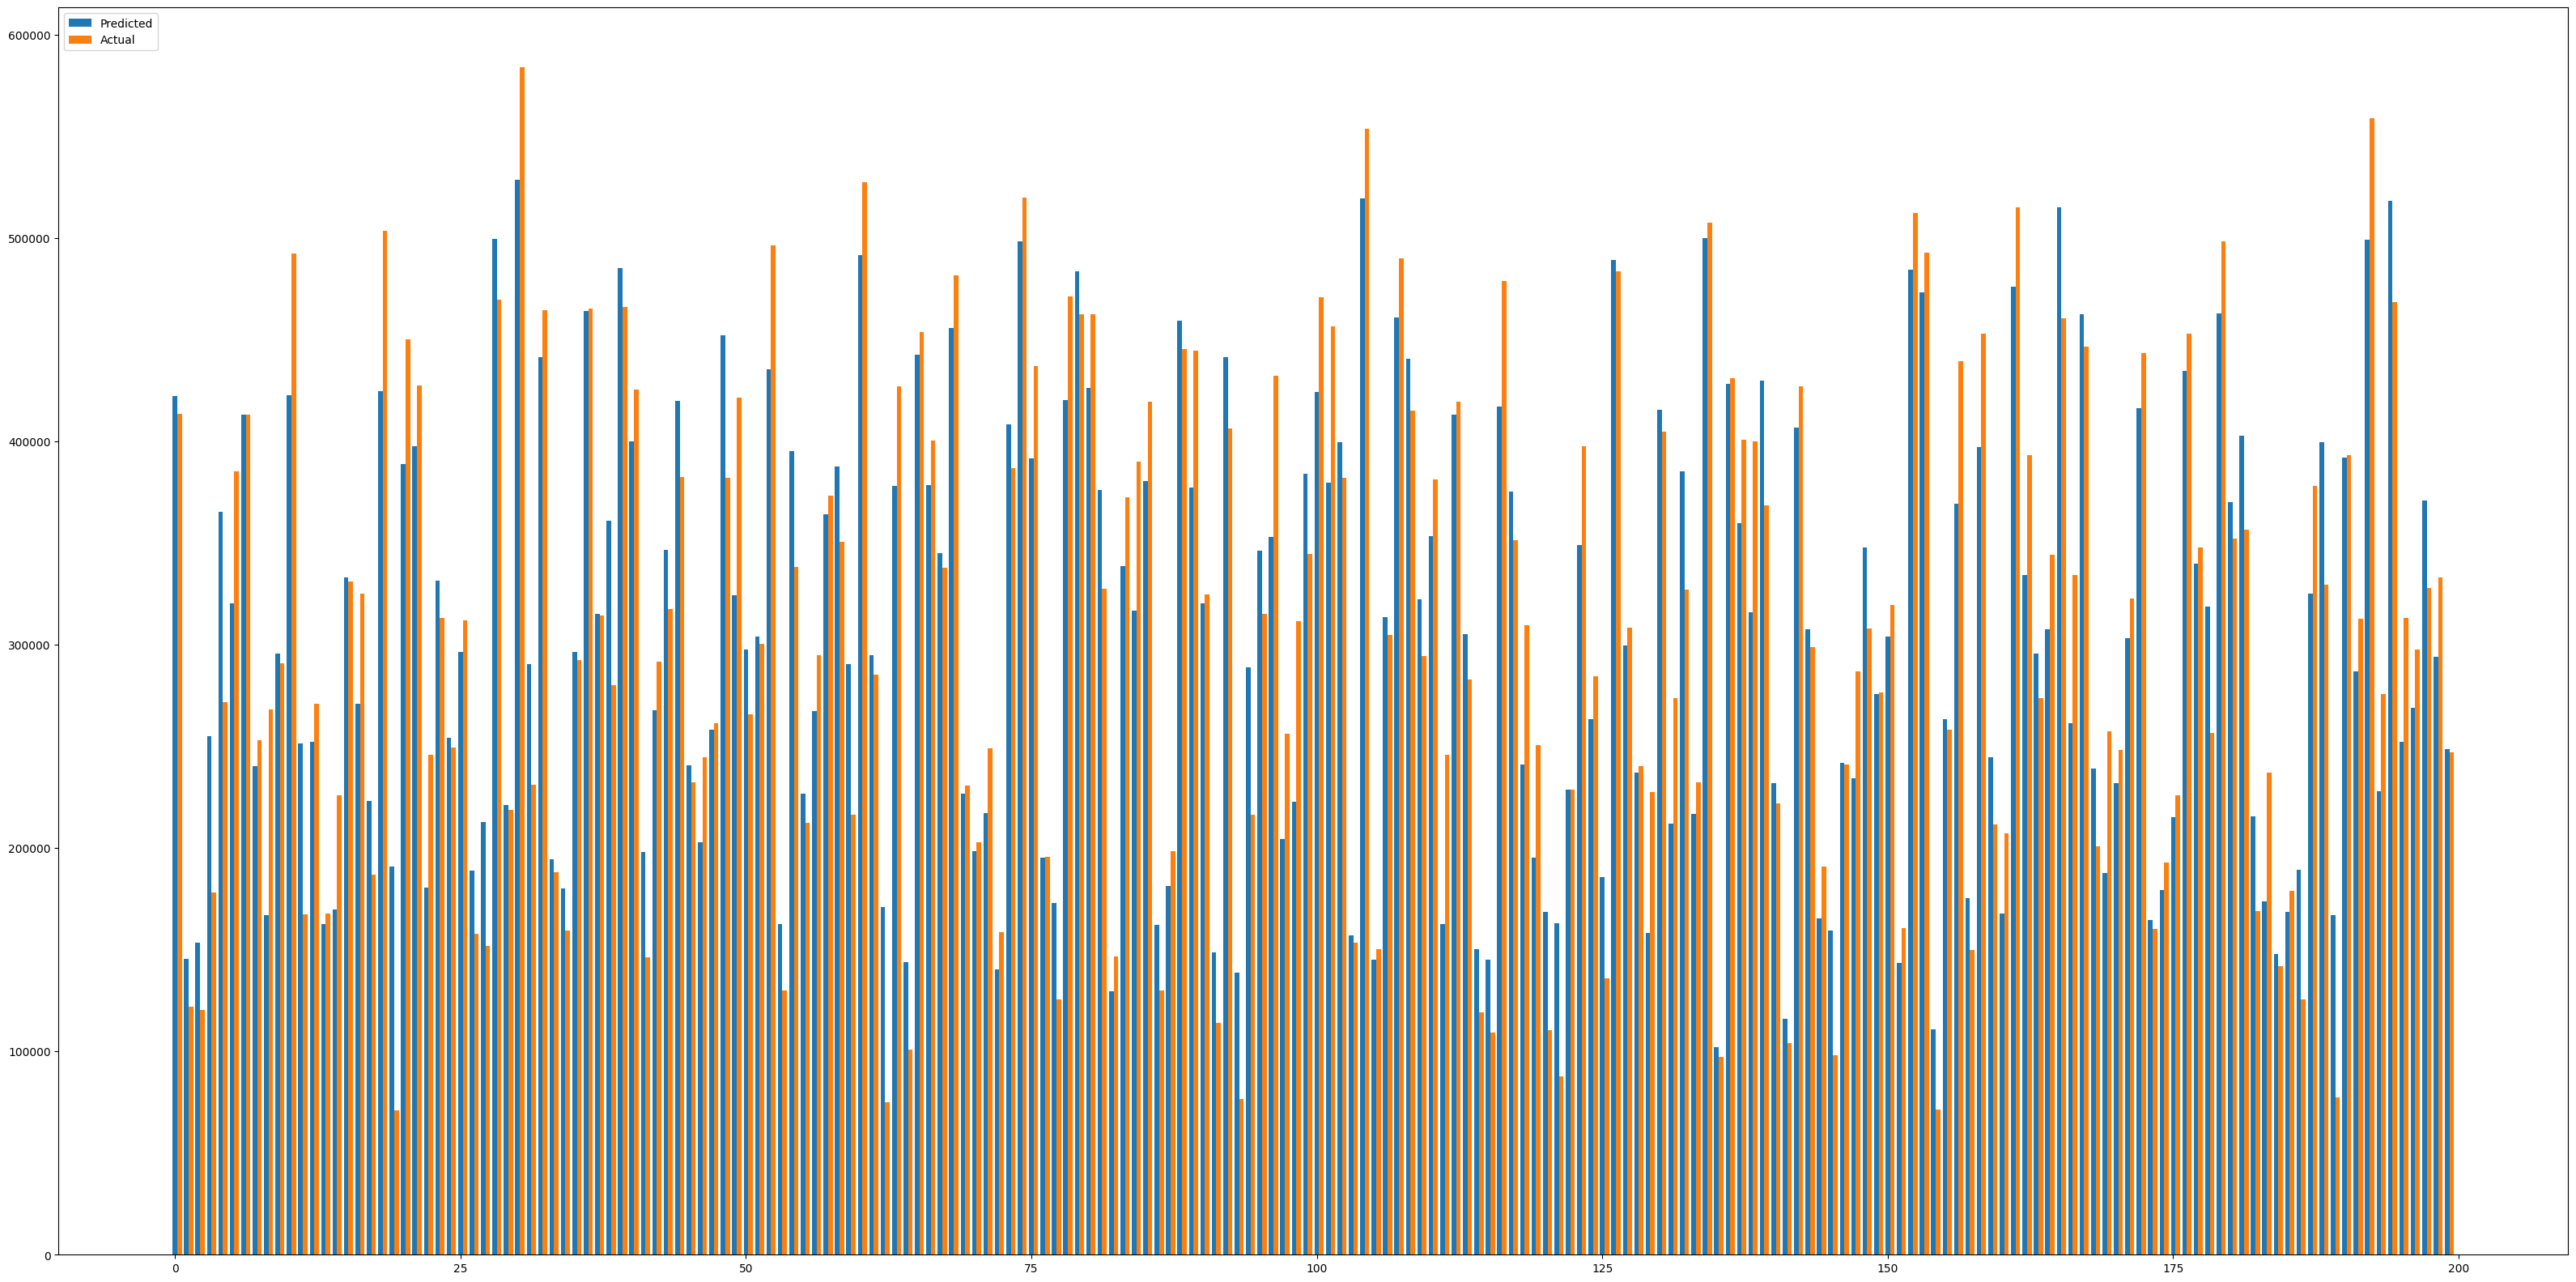

In [36]:
ind = np.arange(y_pred.size) # Adjust the x-axis to match the number of predictions
plt.figure(figsize=(40,20))

width = 0.4

plt.bar(ind,  y_pred.flatten(), width, label='Predicted')
plt.bar(ind + width, y_test, width, label='Actual')
plt.legend(loc='upper left')
plt.show()